In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
plt.style.use('bmh')

In [ ]:
stock_name = ""
df = web.DataReader('AAPL', data_source='yahoo', start='2000-01-01', end='2020-7-01')
df

RemoteDataError: ignored

In [ ]:
df.shape

(5157, 6)

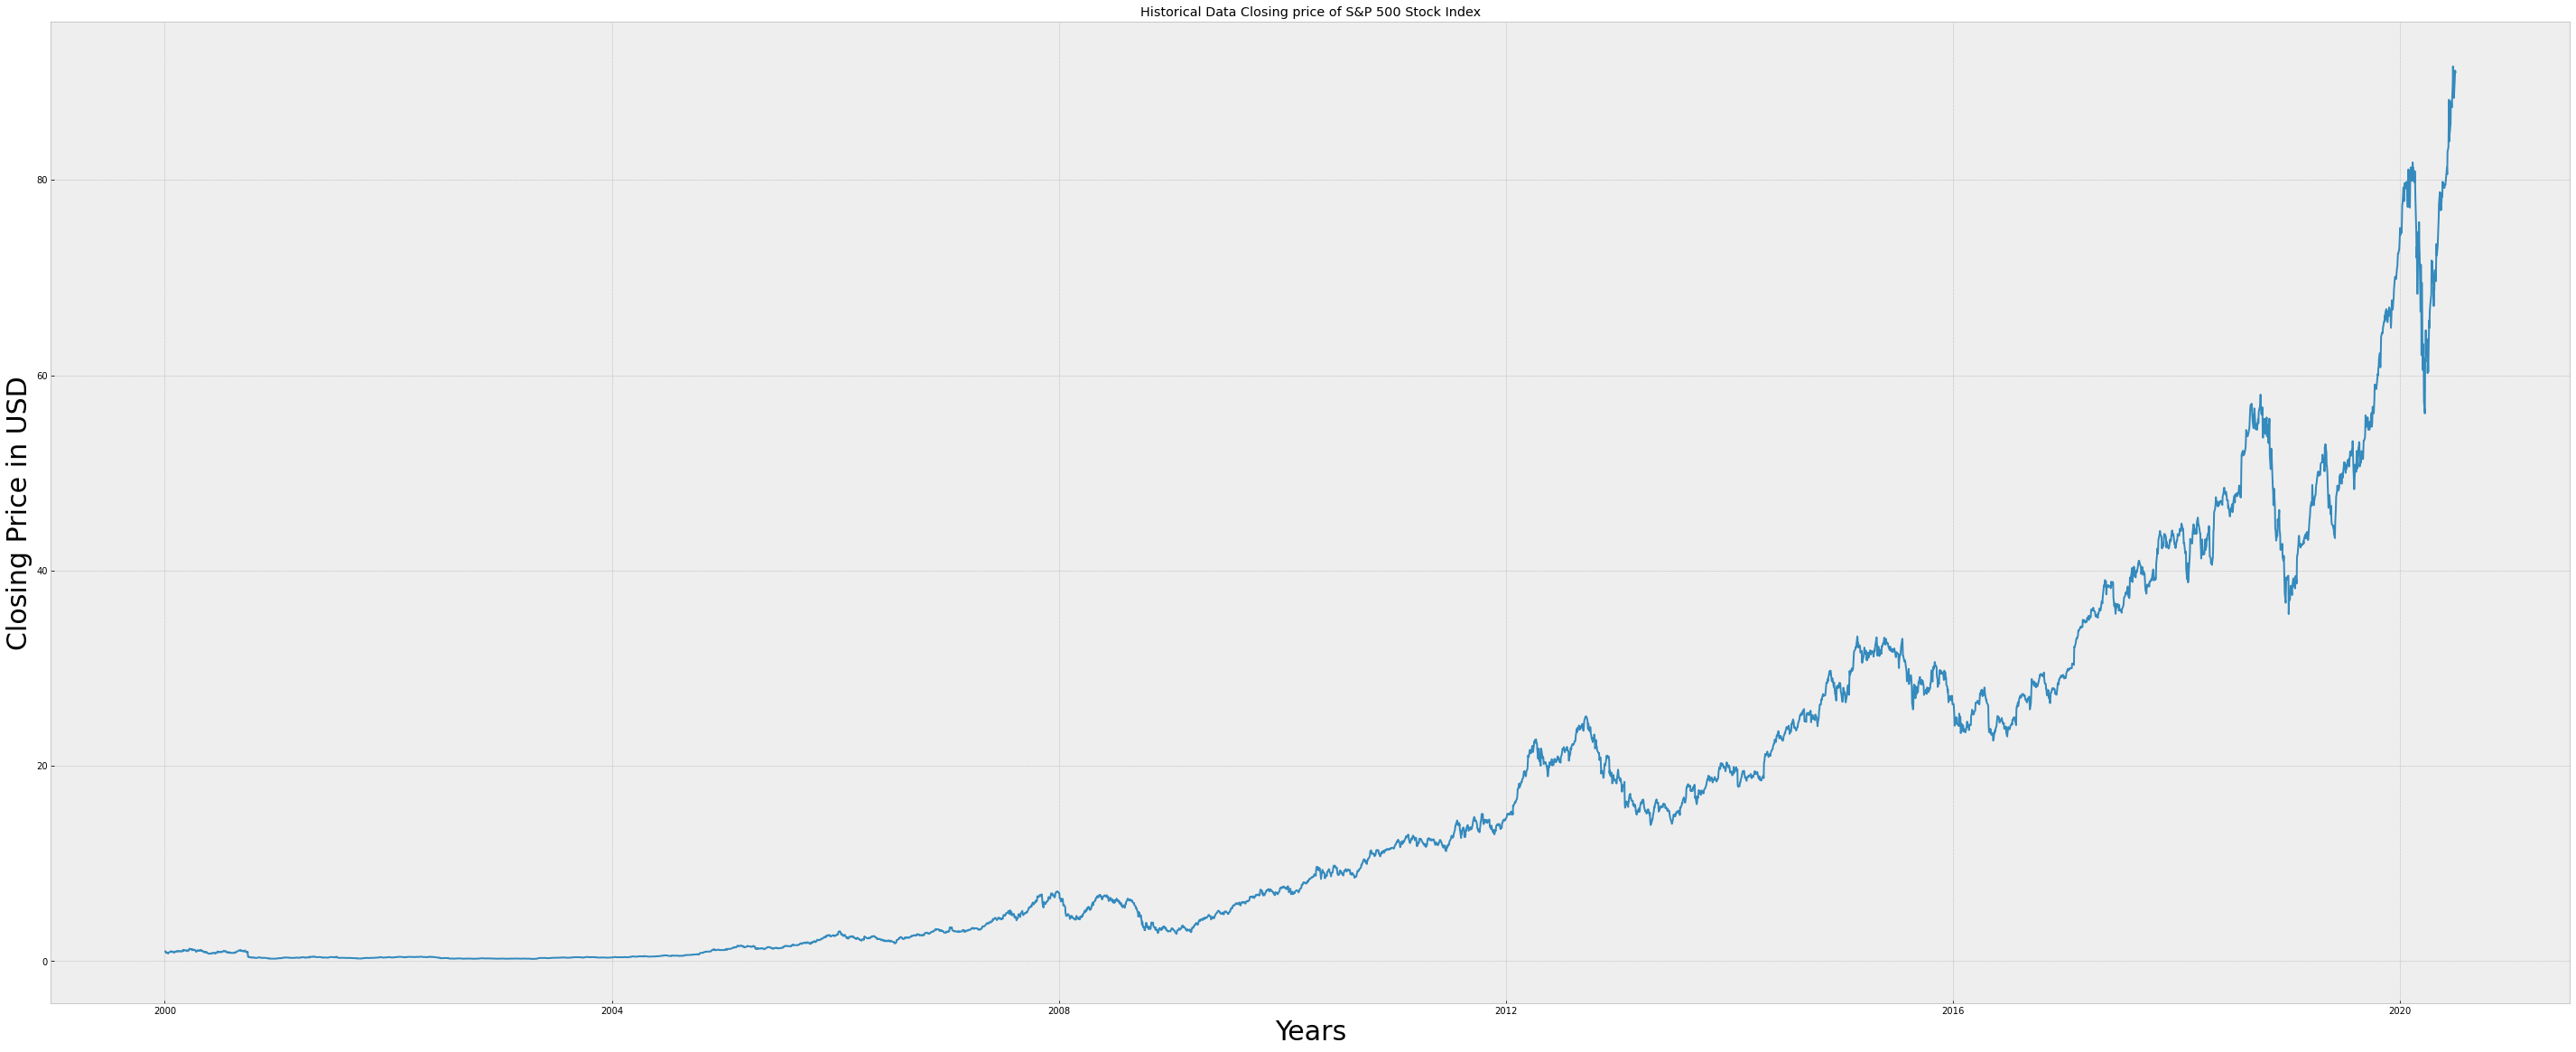

In [ ]:
plt.figure(figsize=(50,20))
plt.title('Historical Data Closing price of S&P 500 Stock Index')
plt.plot(df['Close'])
plt.xlabel('Years',fontsize=30)
plt.ylabel('Closing Price in USD',fontsize=30)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=5, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=5, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

Epoch 1/20
229/229 [==============================] - ETA: 0s - loss: 2.4880e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.806236
2016-05-31  24.965000    23.900831
2016-06-01  24.615000    23.996405
2016-06-02  24.430000    24.078012
2016-06-03  24.480000    24.142340
...               ...          ...
2020-06-25  91.209999    48.976967
2020-06-26  88.407501    49.074276
2020-06-29  90.445000    49.141342
2020-06-30  91.199997    49.190308
2020-07-01  91.027496    49.250973

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 2.4880e-05 - accuracy: 2.7330e-04 - val_loss: 2.7758e-04 - val_accuracy: 0.0000e+00
Epoch 2/20
  3/229 [..............................] - ETA: 5s - loss: 1.2517e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 2.4400e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.663681
2016-05-31  24.965000    23.769791
2016-06-01  24.615000    23.875702
2016-06-02  24.430000    23.965448
2016-06-03  24.480000    24.035620
...               ...          ...
2020-06-25  91.209999    49.959942
2020-06-26  88.407501    50.066944
2020-06-29  90.445000    50.138321
2020-06-30  91.199997    50.191704
2020-07-01  91.027496    50.257759

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 2.4400e-05 - accuracy: 2.7330e-04 - val_loss: 2.8906e-04 - val_accuracy: 0.0000e+00
Epoch 3/20
  3/229 [..............................] - ETA: 5s - loss: 1.2646e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 2.2718e-05 - accuracy: 2.7412e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.717962
2016-05-31  24.965000    23.838335
2016-06-01  24.615000    23.956848
2016-06-02  24.430000    24.056393
2016-06-03  24.480000    24.133419
...               ...          ...
2020-06-25  91.209999    51.255440
2020-06-26  88.407501    51.374771
2020-06-29  90.445000    51.451756
2020-06-30  91.199997    51.510880
2020-07-01  91.027496    51.583687

[1031 rows x 2 columns]
229/229 [==============================] - 10s 46ms/step - loss: 2.2713e-05 - accuracy: 2.7330e-04 - val_loss: 2.6226e-04 - val_accuracy: 0.0000e+00
Epoch 4/20
  3/229 [..............................] - ETA: 5s - loss: 2.8156e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 2.1557e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.699759
2016-05-31  24.965000    23.836330
2016-06-01  24.615000    23.969580
2016-06-02  24.430000    24.080870
2016-06-03  24.480000    24.166445
...               ...          ...
2020-06-25  91.209999    53.054420
2020-06-26  88.407501    53.188324
2020-06-29  90.445000    53.272339
2020-06-30  91.199997    53.338562
2020-07-01  91.027496    53.419724

[1031 rows x 2 columns]
229/229 [==============================] - 11s 46ms/step - loss: 2.1557e-05 - accuracy: 2.7330e-04 - val_loss: 2.2781e-04 - val_accuracy: 0.0000e+00
Epoch 5/20
  3/229 [..............................] - ETA: 5s - loss: 1.9280e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 2.1841e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.527540
2016-05-31  24.965000    23.682188
2016-06-01  24.615000    23.831482
2016-06-02  24.430000    23.955296
2016-06-03  24.480000    24.049629
...               ...          ...
2020-06-25  91.209999    54.608105
2020-06-26  88.407501    54.758476
2020-06-29  90.445000    54.850567
2020-06-30  91.199997    54.924847
2020-07-01  91.027496    55.015160

[1031 rows x 2 columns]
229/229 [==============================] - 11s 46ms/step - loss: 2.1841e-05 - accuracy: 2.7330e-04 - val_loss: 2.4317e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
  3/229 [..............................] - ETA: 5s - loss: 2.4807e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 2.0157e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.165878
2016-05-31  24.965000    23.338884
2016-06-01  24.615000    23.504406
2016-06-02  24.430000    23.640709
2016-06-03  24.480000    23.743595
...               ...          ...
2020-06-25  91.209999    56.147858
2020-06-26  88.407501    56.315392
2020-06-29  90.445000    56.415649
2020-06-30  91.199997    56.498192
2020-07-01  91.027496    56.598007

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 2.0157e-05 - accuracy: 2.7330e-04 - val_loss: 3.0835e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
  3/229 [..............................] - ETA: 5s - loss: 1.8077e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 2.0119e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.334196
2016-05-31  24.965000    23.525421
2016-06-01  24.615000    23.706736
2016-06-02  24.430000    23.854769
2016-06-03  24.480000    23.965219
...               ...          ...
2020-06-25  91.209999    58.153744
2020-06-26  88.407501    58.338470
2020-06-29  90.445000    58.446491
2020-06-30  91.199997    58.536968
2020-07-01  91.027496    58.646103

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 2.0119e-05 - accuracy: 2.7330e-04 - val_loss: 2.3808e-04 - val_accuracy: 0.0000e+00
Epoch 8/20
  3/229 [..............................] - ETA: 5s - loss: 1.9013e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.9530e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.601276
2016-05-31  24.965000    23.808043
2016-06-01  24.615000    24.002632
2016-06-02  24.430000    24.160074
2016-06-03  24.480000    24.276062
...               ...          ...
2020-06-25  91.209999    60.272430
2020-06-26  88.407501    60.471909
2020-06-29  90.445000    60.585777
2020-06-30  91.199997    60.682442
2020-07-01  91.027496    60.799278

[1031 rows x 2 columns]
229/229 [==============================] - 10s 46ms/step - loss: 1.9530e-05 - accuracy: 2.7330e-04 - val_loss: 1.5710e-04 - val_accuracy: 0.0000e+00
Epoch 9/20
  3/229 [..............................] - ETA: 5s - loss: 2.0976e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 2.2350e-05 - accuracy: 2.7412e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.441689
2016-05-31  24.965000    23.657059
2016-06-01  24.615000    23.857870
2016-06-02  24.430000    24.018171
2016-06-03  24.480000    24.133949
...               ...          ...
2020-06-25  91.209999    61.038124
2020-06-26  88.407501    61.246708
2020-06-29  90.445000    61.362114
2020-06-30  91.199997    61.460892
2020-07-01  91.027496    61.581169

[1031 rows x 2 columns]
229/229 [==============================] - 10s 46ms/step - loss: 2.2313e-05 - accuracy: 2.7330e-04 - val_loss: 1.8369e-04 - val_accuracy: 0.0000e+00
Epoch 10/20
  3/229 [..............................] - ETA: 5s - loss: 1.1794e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 1.7374e-05 - accuracy: 2.7412e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.105639
2016-05-31  24.965000    23.338564
2016-06-01  24.615000    23.553734
2016-06-02  24.430000    23.723364
2016-06-03  24.480000    23.843559
...               ...          ...
2020-06-25  91.209999    62.787144
2020-06-26  88.407501    63.014130
2020-06-29  90.445000    63.136112
2020-06-30  91.199997    63.242050
2020-07-01  91.027496    63.371410

[1031 rows x 2 columns]
229/229 [==============================] - 10s 46ms/step - loss: 1.7416e-05 - accuracy: 2.7330e-04 - val_loss: 2.4045e-04 - val_accuracy: 0.0000e+00
Epoch 11/20
  3/229 [..............................] - ETA: 5s - loss: 2.1643e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.6943e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.606667
2016-05-31  24.965000    23.851542
2016-06-01  24.615000    24.075190
2016-06-02  24.430000    24.248304
2016-06-03  24.480000    24.367474
...               ...          ...
2020-06-25  91.209999    64.855377
2020-06-26  88.407501    65.096382
2020-06-29  90.445000    65.220863
2020-06-30  91.199997    65.330177
2020-07-01  91.027496    65.465317

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.6943e-05 - accuracy: 2.7330e-04 - val_loss: 1.2988e-04 - val_accuracy: 0.0000e+00
Epoch 12/20
  3/229 [..............................] - ETA: 5s - loss: 1.6264e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.8141e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.759043
2016-05-31  24.965000    24.011482
2016-06-01  24.615000    24.239405
2016-06-02  24.430000    24.412321
2016-06-03  24.480000    24.527531
...               ...          ...
2020-06-25  91.209999    66.072182
2020-06-26  88.407501    66.325371
2020-06-29  90.445000    66.449768
2020-06-30  91.199997    66.560699
2020-07-01  91.027496    66.700043

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.8141e-05 - accuracy: 2.7330e-04 - val_loss: 1.1041e-04 - val_accuracy: 0.0000e+00
Epoch 13/20
  3/229 [..............................] - ETA: 5s - loss: 1.2262e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.9447e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.884785
2016-05-31  24.965000    24.136034
2016-06-01  24.615000    24.360933
2016-06-02  24.430000    24.528471
2016-06-03  24.480000    24.636721
...               ...          ...
2020-06-25  91.209999    66.734528
2020-06-26  88.407501    66.989777
2020-06-29  90.445000    67.109421
2020-06-30  91.199997    67.217056
2020-07-01  91.027496    67.355232

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.9447e-05 - accuracy: 2.7330e-04 - val_loss: 9.4170e-05 - val_accuracy: 0.0000e+00
Epoch 14/20
  3/229 [..............................] - ETA: 5s - loss: 2.3081e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.6027e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.910185
2016-05-31  24.965000    24.169813
2016-06-01  24.615000    24.398952
2016-06-02  24.430000    24.565235
2016-06-03  24.480000    24.667683
...               ...          ...
2020-06-25  91.209999    67.918564
2020-06-26  88.407501    68.189590
2020-06-29  90.445000    68.309196
2020-06-30  91.199997    68.418854
2020-07-01  91.027496    68.562431

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.6027e-05 - accuracy: 2.7330e-04 - val_loss: 9.3809e-05 - val_accuracy: 0.0000e+00
Epoch 15/20
  3/229 [..............................] - ETA: 5s - loss: 1.4008e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.6615e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.836636
2016-05-31  24.965000    24.101181
2016-06-01  24.615000    24.331301
2016-06-02  24.430000    24.493502
2016-06-03  24.480000    24.587938
...               ...          ...
2020-06-25  91.209999    68.782753
2020-06-26  88.407501    69.066628
2020-06-29  90.445000    69.183434
2020-06-30  91.199997    69.292831
2020-07-01  91.027496    69.439873

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.6615e-05 - accuracy: 2.7330e-04 - val_loss: 1.0475e-04 - val_accuracy: 0.0000e+00
Epoch 16/20
  3/229 [..............................] - ETA: 5s - loss: 9.8678e-06 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 1.5453e-05 - accuracy: 2.7412e-04                Close  Predictions
Date                              
2016-05-27  25.087500    24.048275
2016-05-31  24.965000    24.317183
2016-06-01  24.615000    24.547712
2016-06-02  24.430000    24.705215
2016-06-03  24.480000    24.791115
...               ...          ...
2020-06-25  91.209999    70.043274
2020-06-26  88.407501    70.339630
2020-06-29  90.445000    70.452202
2020-06-30  91.199997    70.560524
2020-07-01  91.027496    70.710823

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.5444e-05 - accuracy: 2.7330e-04 - val_loss: 8.5299e-05 - val_accuracy: 0.0000e+00
Epoch 17/20
  3/229 [..............................] - ETA: 5s - loss: 2.0782e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


229/229 [==============================] - ETA: 0s - loss: 1.5238e-05 - accuracy: 2.7330e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.542313
2016-05-31  24.965000    23.814505
2016-06-01  24.615000    24.044125
2016-06-02  24.430000    24.195389
2016-06-03  24.480000    24.271084
...               ...          ...
2020-06-25  91.209999    70.628105
2020-06-26  88.407501    70.938316
2020-06-29  90.445000    71.046524
2020-06-30  91.199997    71.153389
2020-07-01  91.027496    71.307014

[1031 rows x 2 columns]
229/229 [==============================] - 10s 46ms/step - loss: 1.5238e-05 - accuracy: 2.7330e-04 - val_loss: 1.6106e-04 - val_accuracy: 0.0000e+00
Epoch 18/20
  3/229 [..............................] - ETA: 5s - loss: 2.0306e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 1.6408e-05 - accuracy: 2.7412e-04                Close  Predictions
Date                              
2016-05-27  25.087500    23.816681
2016-05-31  24.965000    24.085064
2016-06-01  24.615000    24.308104
2016-06-02  24.430000    24.449533
2016-06-03  24.480000    24.513737
...               ...          ...
2020-06-25  91.209999    71.173683
2020-06-26  88.407501    71.487831
2020-06-29  90.445000    71.585075
2020-06-30  91.199997    71.685852
2020-07-01  91.027496    71.838310

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.6426e-05 - accuracy: 2.7330e-04 - val_loss: 1.1523e-04 - val_accuracy: 0.0000e+00
Epoch 19/20
  3/229 [..............................] - ETA: 5s - loss: 1.3716e-05 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 1.4545e-05 - accuracy: 2.7412e-04                Close  Predictions
Date                              
2016-05-27  25.087500    24.315702
2016-05-31  24.965000    24.589859
2016-06-01  24.615000    24.813765
2016-06-02  24.430000    24.949564
2016-06-03  24.480000    25.003460
...               ...          ...
2020-06-25  91.209999    73.345871
2020-06-26  88.407501    73.675697
2020-06-29  90.445000    73.766090
2020-06-30  91.199997    73.864906
2020-07-01  91.027496    74.021988

[1031 rows x 2 columns]
229/229 [==============================] - 10s 45ms/step - loss: 1.4572e-05 - accuracy: 2.7330e-04 - val_loss: 6.8245e-05 - val_accuracy: 0.0000e+00
Epoch 20/20
  3/229 [..............................] - ETA: 5s - loss: 9.2356e-06 - accuracy: 0.0000e+00

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


228/229 [============================>.] - ETA: 0s - loss: 1.4239e-05 - accuracy: 2.7412e-04

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                Close  Predictions
Date                              
2016-05-27  25.087500    23.934126
2016-05-31  24.965000    24.207579
2016-06-01  24.615000    24.426064
2016-06-02  24.430000    24.550873
2016-06-03  24.480000    24.590393
...               ...          ...
2020-06-25  91.209999    73.425484
2020-06-26  88.407501    73.767555
2020-06-29  90.445000    73.844444
2020-06-30  91.199997    73.937325
2020-07-01  91.027496    74.096176

[1031 rows x 2 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

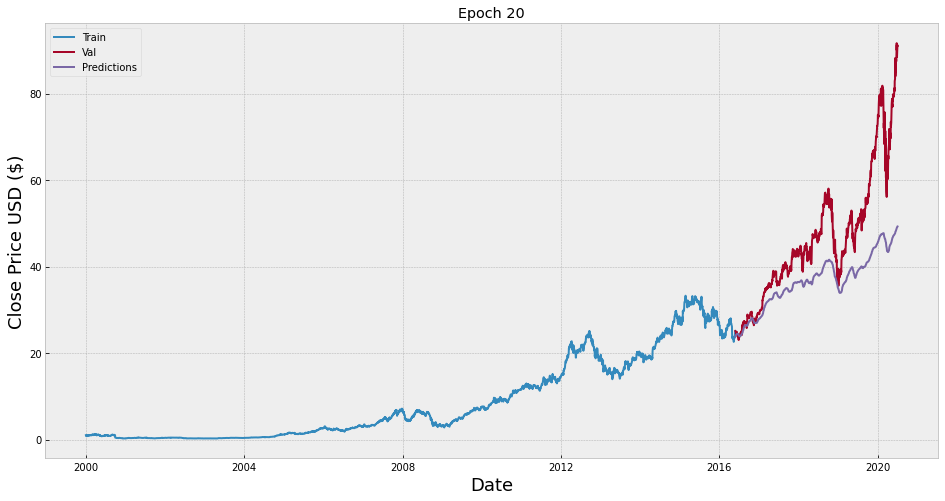

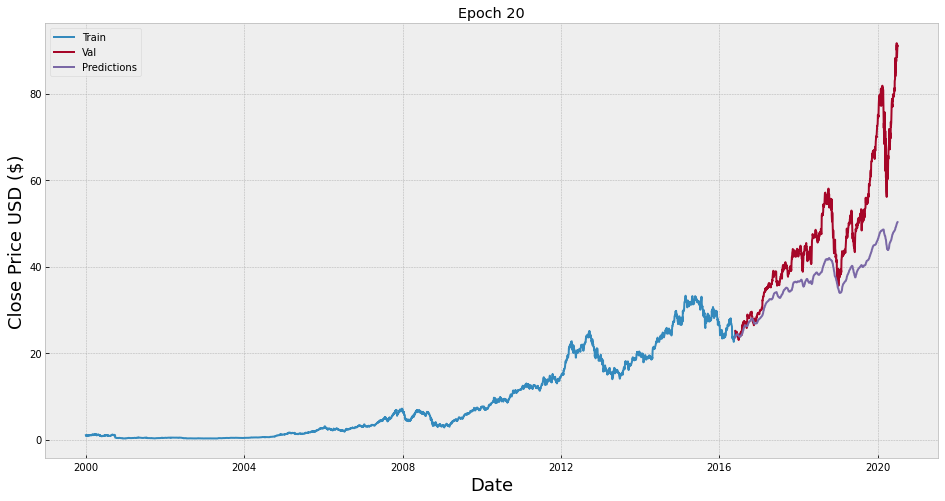

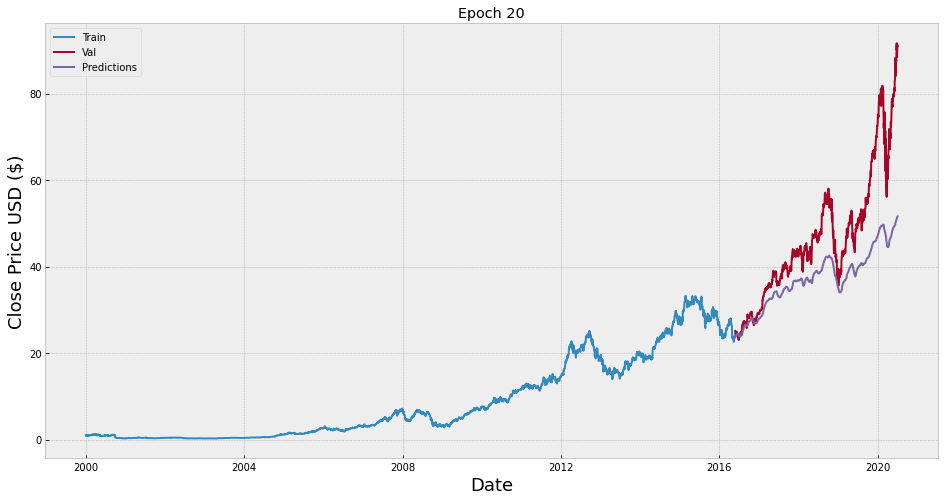

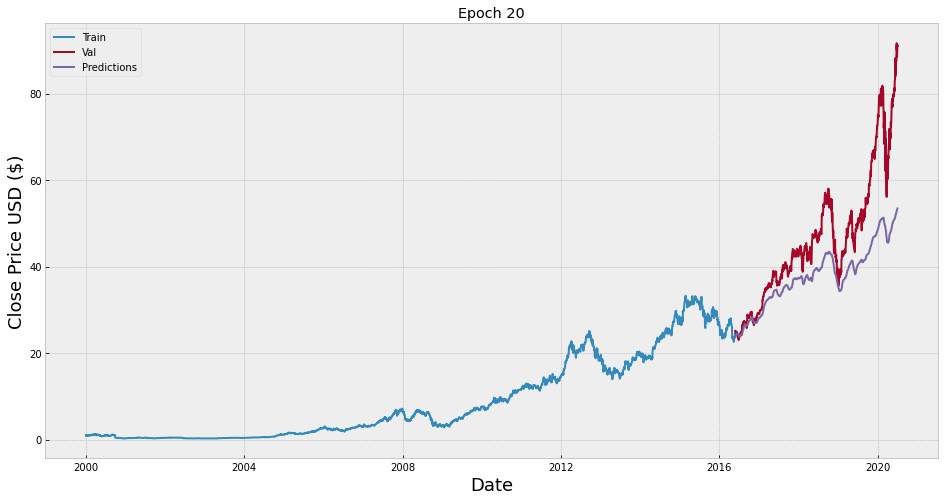

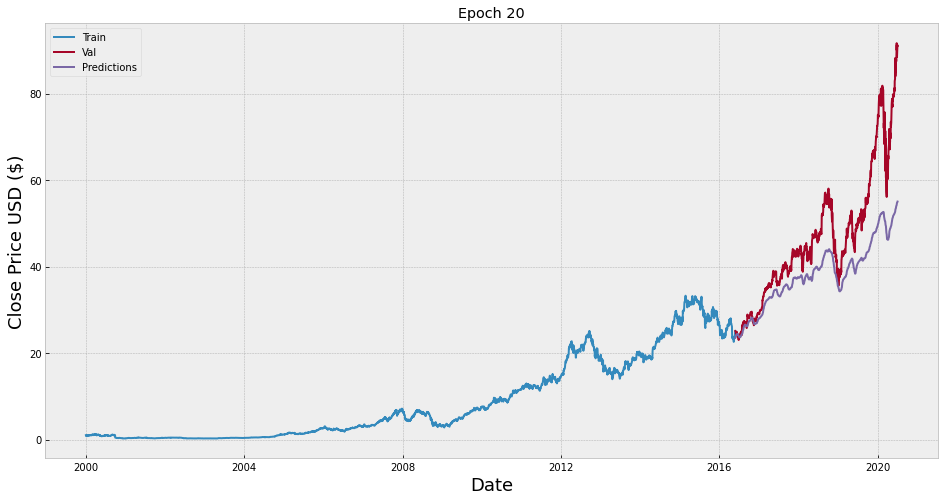

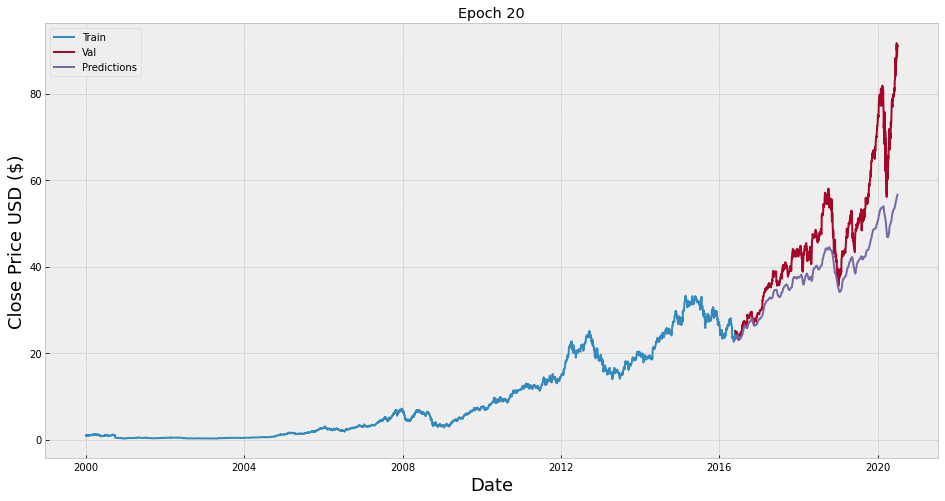

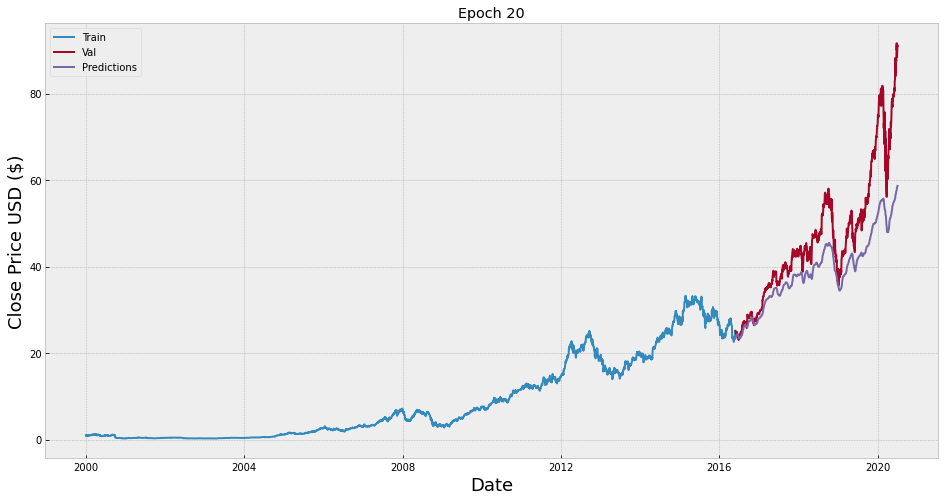

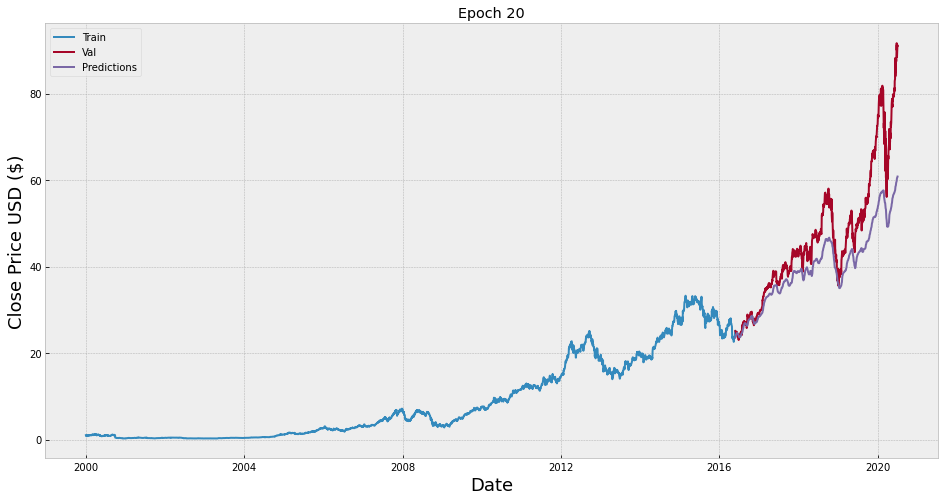

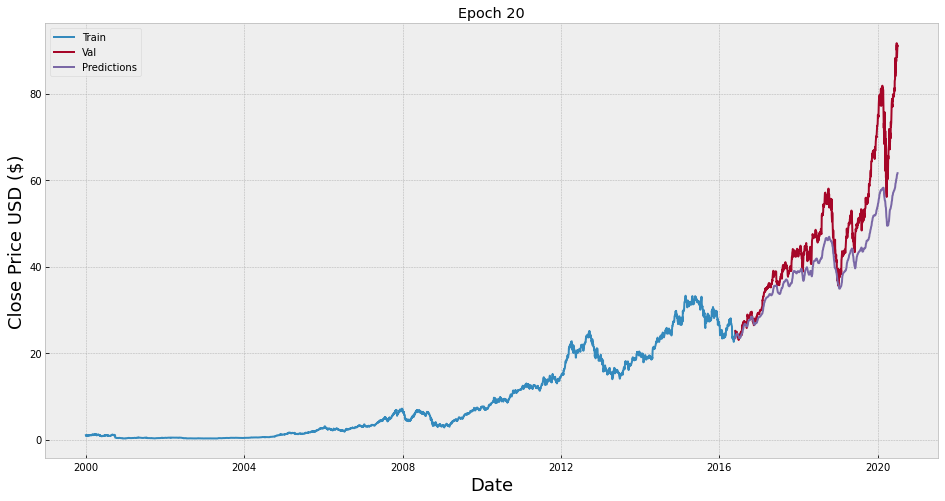

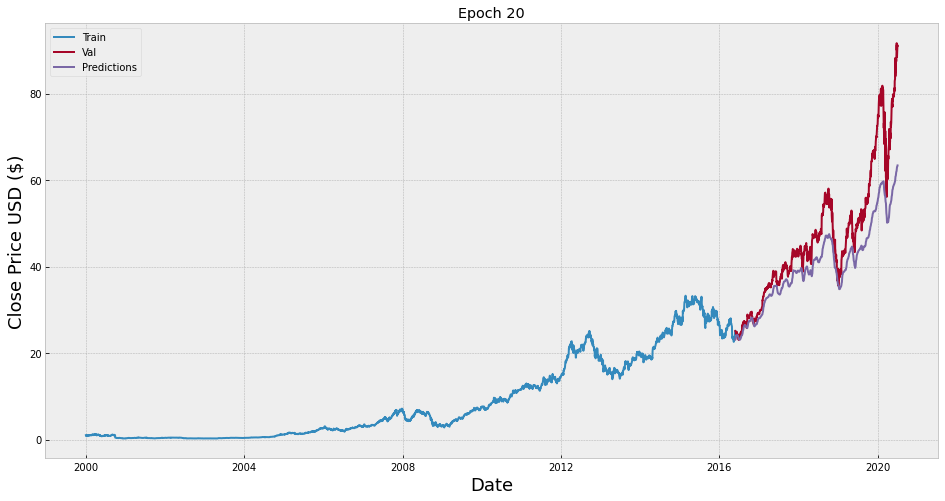

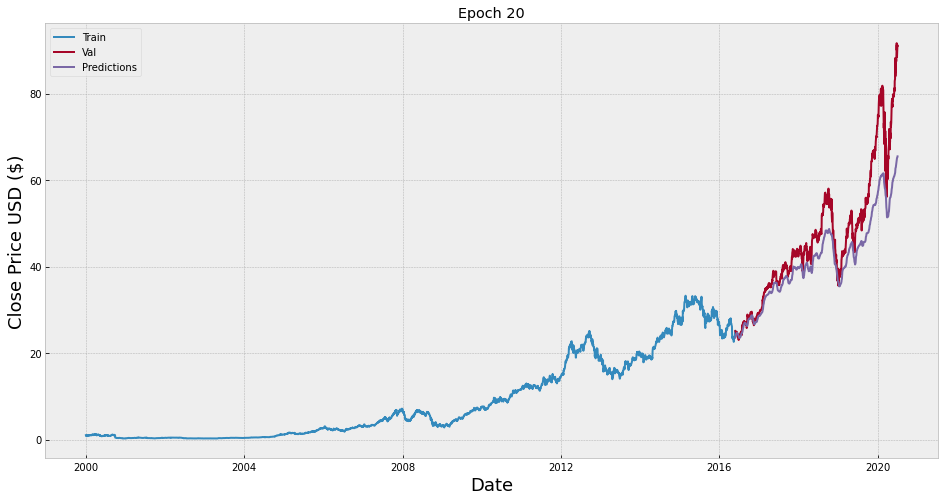

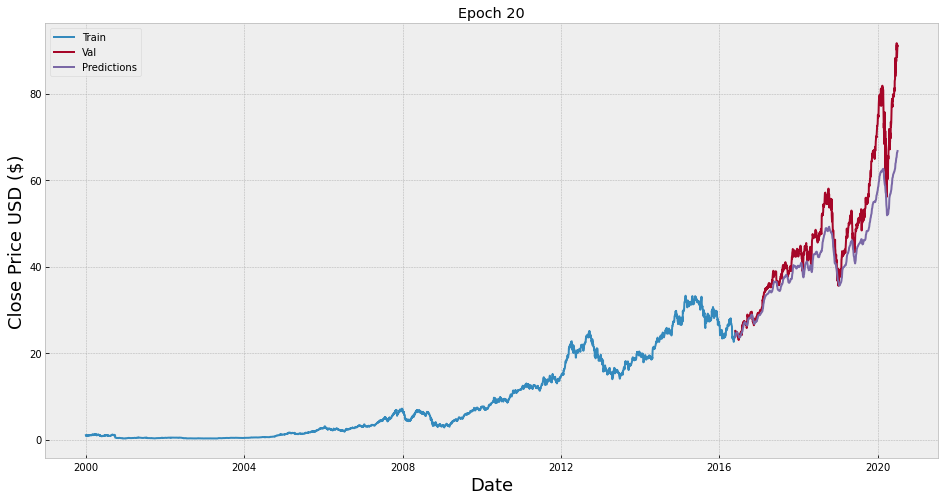

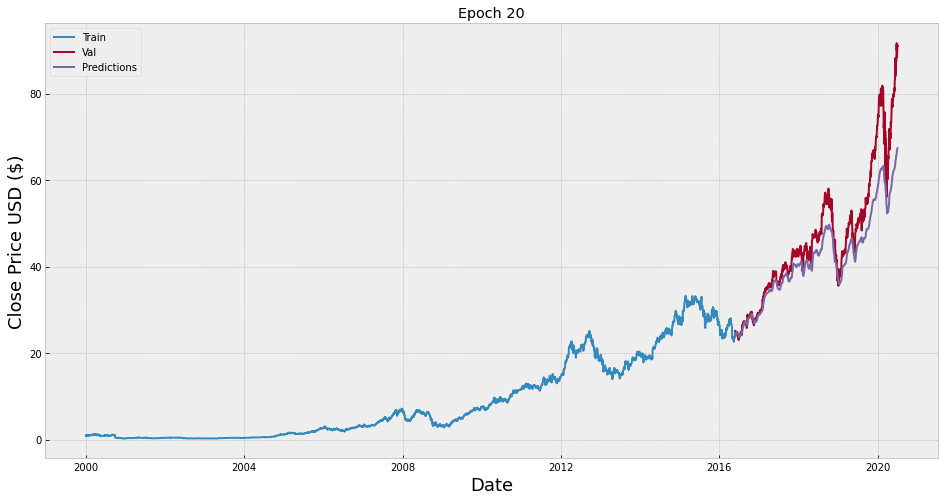

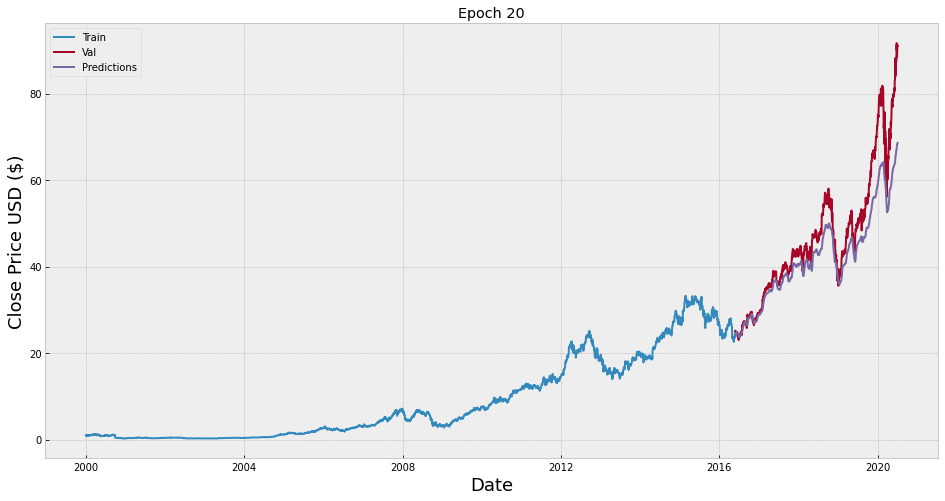

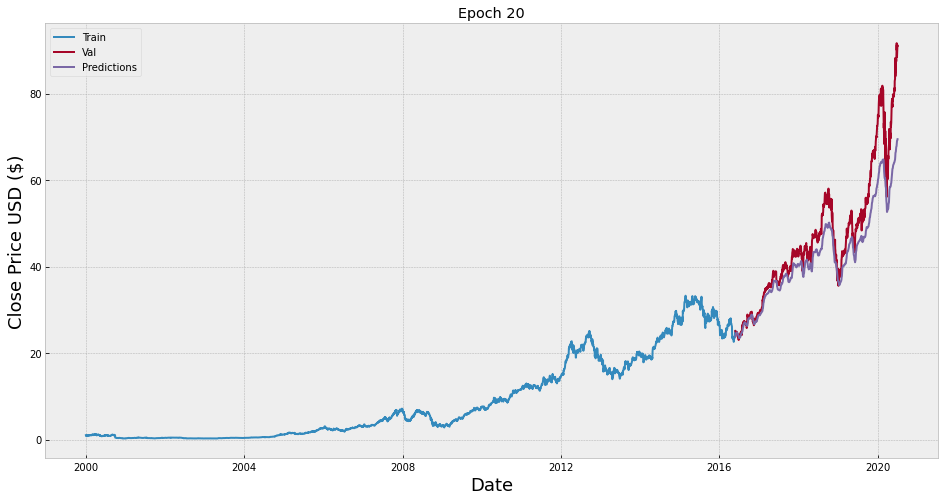

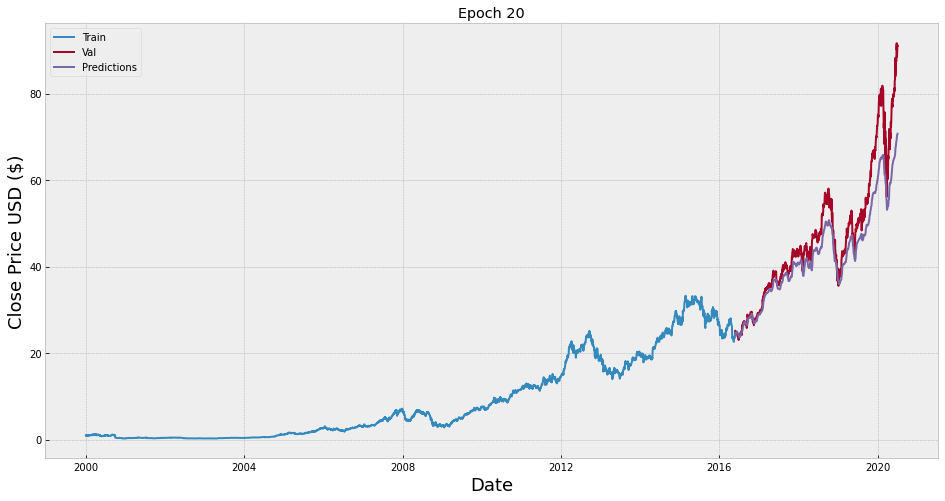

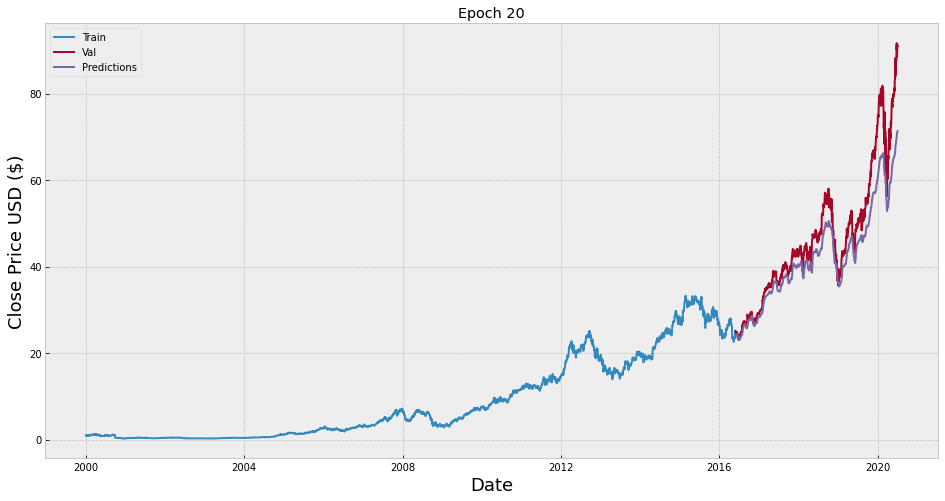

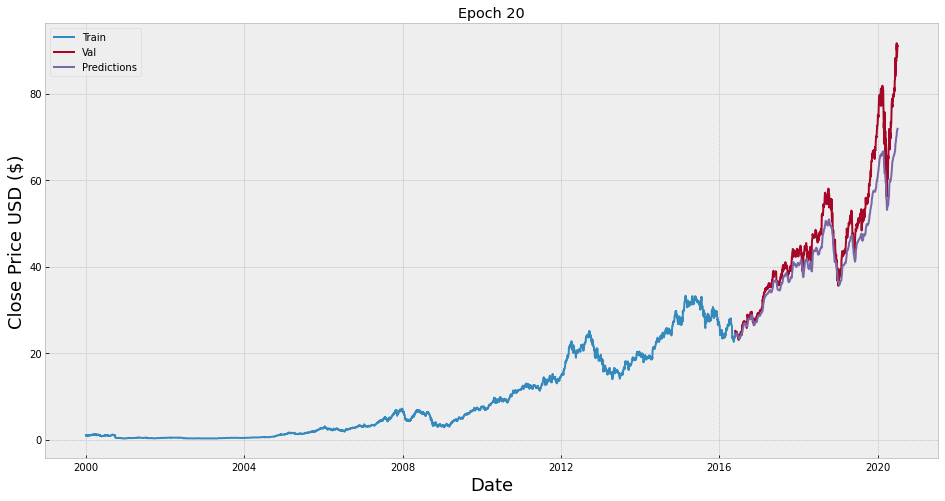

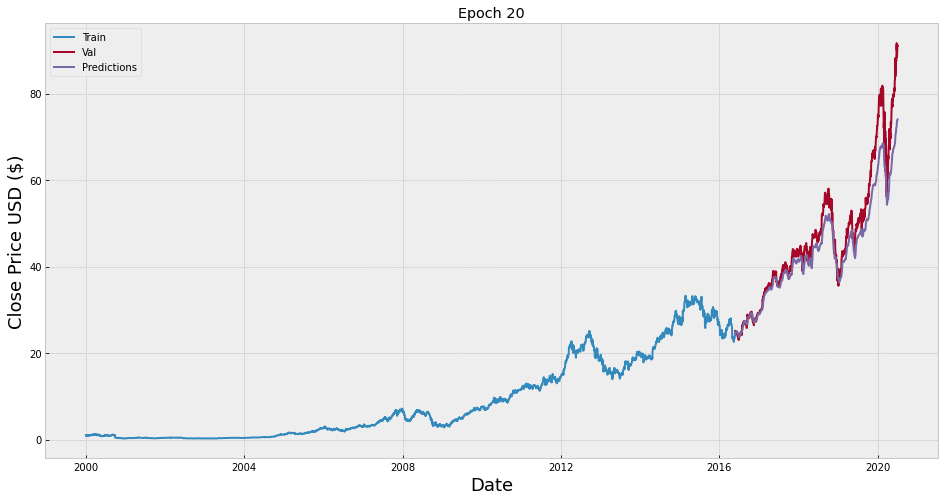

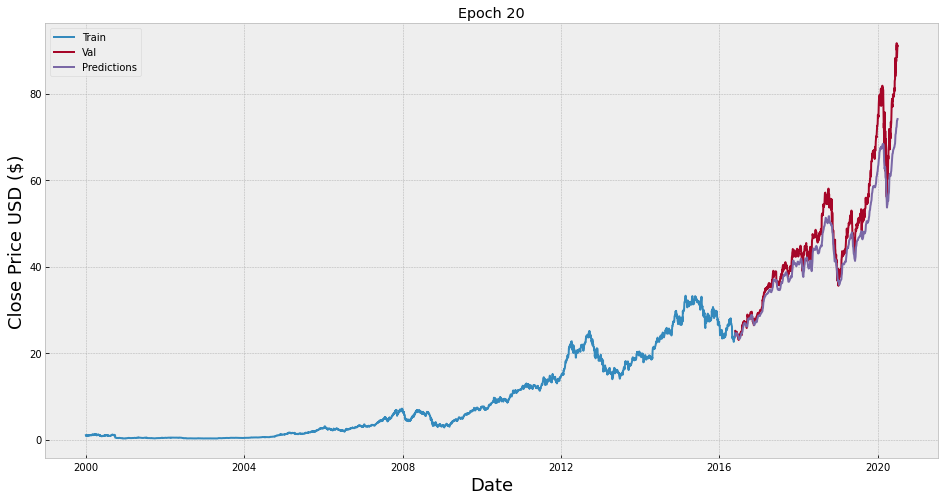

229/229 [==============================] - 15s 66ms/step - loss: 1.4217e-05 - accuracy: 2.7330e-04 - val_loss: 1.0770e-04 - val_accuracy: 0.0000e+00


In [ ]:
set_epoch = 20
callbacks = myCallback()
epoch_nbm = 0
batch_nbm = 0
res = model.fit(x_train, y_train, batch_size=16, epochs=set_epoch, validation_split=0.1, callbacks=[callbacks])



In [ ]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

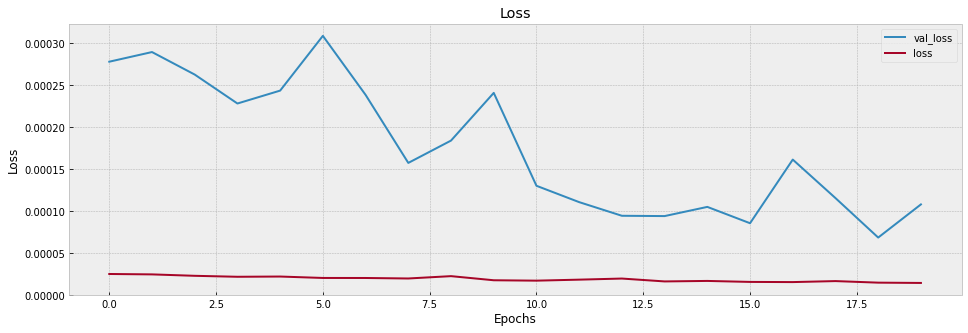

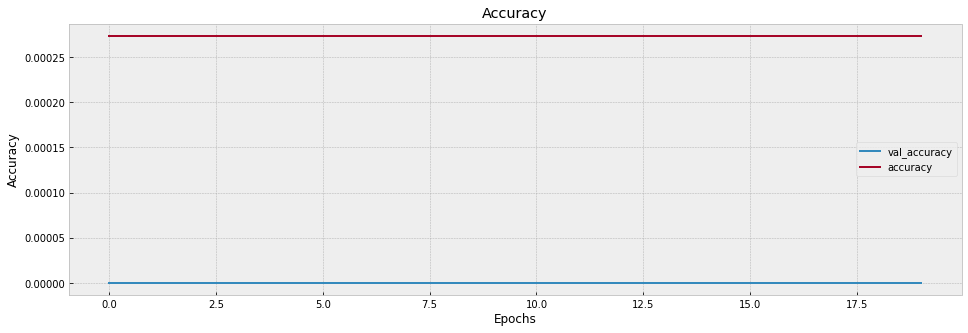

In [ ]:
visualize_training_results(res)

In [ ]:
apple_quote = web.DataReader('SPY', data_source='yahoo', start='2012-01-01', end='2020-7-25')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[97.05509]]


In [ ]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-7-01', end='2020-7-01')
print(apple_quote2['Close'])

Date
2020-07-01    91.027496
Name: Close, dtype: float64


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      epoch_nbm = epoch + 1
      test_data = scaled_data[training_data_len - 60: , : ]
      x_test = []
      y_test =  dataset[training_data_len : , : ]
      for i in range(60,len(test_data)):
          x_test.append(test_data[i-60:i,0])
      x_test = np.array(x_test)
      x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
      predictions = model.predict(x_test)
      predictions = scaler.inverse_transform(predictions)
      rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
      rmse
      train = data[:training_data_len]
      valid = data[training_data_len:]
      valid['Predictions'] = predictions
      plt.figure(figsize=(16,8))
      plt.title(f'Epoch {set_epoch}')
      plt.xlabel('Date', fontsize=18)
      plt.ylabel('Close Price USD ($)', fontsize=18)
      plt.plot(train['Close'])
      plt.plot(valid[['Close', 'Predictions']], )
      plt.legend(['Train', 'Val', 'Predictions'])
      print(valid)
      if(epoch_nbm is set_epoch):
        plt.savefig(f"SPY_epoch{set_epoch}.png")
        files.download(f"SPY_epoch{set_epoch}.png")
        plt.show()
        self.model.stop_training